https://www.youtube.com/watch?v=SSu00IRRraY

In [15]:
import csv
import numpy as np
from sklearn.svm import SVR
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

import quandl

%matplotlib inline

In [16]:
data = quandl.get("WIKI/AAPL")

In [17]:
data.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
1980-12-12,28.75,28.87,28.75,28.75,2093900.0,0.0,1.0,0.422706,0.424470,0.422706,0.422706,117258400.0
1980-12-15,27.38,27.38,27.25,27.25,785200.0,0.0,1.0,0.402563,0.402563,0.400652,0.400652,43971200.0
1980-12-16,25.37,25.37,25.25,25.25,472000.0,0.0,1.0,0.373010,0.373010,0.371246,0.371246,26432000.0
1980-12-17,25.87,26.00,25.87,25.87,385900.0,0.0,1.0,0.380362,0.382273,0.380362,0.380362,21610400.0
1980-12-18,26.63,26.75,26.63,26.63,327900.0,0.0,1.0,0.391536,0.393300,0.391536,0.391536,18362400.0


In [20]:
def plot_results(svm_type, data, length):
    close = np.array(data['Adj. Close'])
    last_close = close[len(close)-(length+10):len(close)-10]
    
    dates = np.arange(length)
    dates = np.reshape(dates, (len(dates), 1))
    
    svr = SVR(kernel=svm_type, C=1e3)
    svr.fit(dates, last_close)
    
    preds = []
    for i in range(10):
        preds.append(svr.predict(i))
        
    plt.scatter(dates, last_close, c='b')
    plt.scatter(np.arange(10) + length, preds, c='r')
    plt.scatter(np.arange(10) + length, close[-10:], c='g')
    
    prices = mpatches.Patch(color='blue', label='Stock Prices')
    predictions = mpatches.Patch(color='red', label='Predictions')
    actual = mpatches.Patch(color='green', label='Actual')
    plt.legend(handles=[prices, predictions, actual])
    
    plt.show()

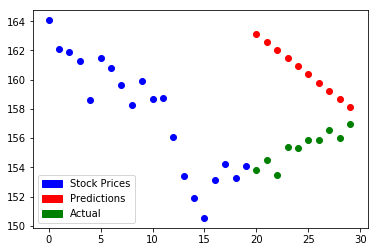

In [21]:
plot_results("linear", data, 20)

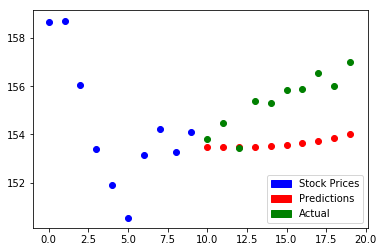

In [22]:
plot_results("poly", data, 10)

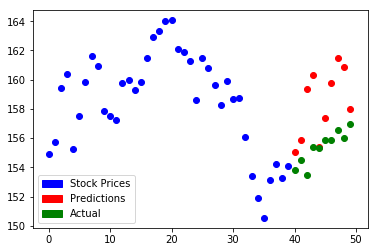

In [23]:
plot_results("rbf", data, 40)